# Customer Churn Data

### About Dataset

This is a dataset contains Customers Subscriptions Records with company and it has various features related to customer demographics, interactions, and financial metrics. The columns in the dataset are as follows:

CustomerID (float64): Unique identifier for each customer.

Age (float64): Age of the customer.

Gender (object): Gender of the customer.

Tenure (float64): Duration of the customer's relationship with the company (in months).

Usage Frequency (float64): Frequency of the customer's usage of the service.

Support Calls (float64): Number of support calls made by the customer.

Payment Delay (float64): Number of times the customer has delayed payments.

Subscription Type (object): Type of subscription the customer has (e.g., basic, standard).

Contract Length (object): Length of the customer's contract (e.g., month, annual).

Total Spend (float64): Total amount of money spent by the customer.

Last Interaction (float64): Number of days since the last interaction with the customer.

Churn (float64): Indicator of whether the customer has churned (1) or not (0).

### Problem Definition
The objective is to develop a model that can differentiate between customers who will churn and those who will stay with the company, using the provided features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
# Reading the dataset
train=pd.read_csv('customer_churn_dataset-training-master.csv')

In [6]:
# Columns in the dataset
train.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [8]:
# Dataset Informations
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [10]:
train.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [12]:
train.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

Removing the missing value row as all the values columns values are missing in this row.

In [15]:
train=train.dropna()

# Age

In [18]:
ages=train.copy()
age_bins = [0, 20, 30, 40, 50, 60, 70, 80]
max_age = ages['Age'].max()
# print(f"Max Age: {max_age}")
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
ages['Age Group'] = pd.cut(ages['Age'], bins=age_bins, labels=age_labels)

In [20]:
# group by age bins and calculate summary statistics
age_group_summary = ages.groupby('Age Group').agg({
    'CustomerID': 'count',
    'Tenure': 'mean',
    'Usage Frequency': 'mean',
    'Support Calls': 'mean',
    'Payment Delay': 'mean',
    'Total Spend': 'mean',
    'Churn': 'mean'
}).reset_index()

# age_group_summary

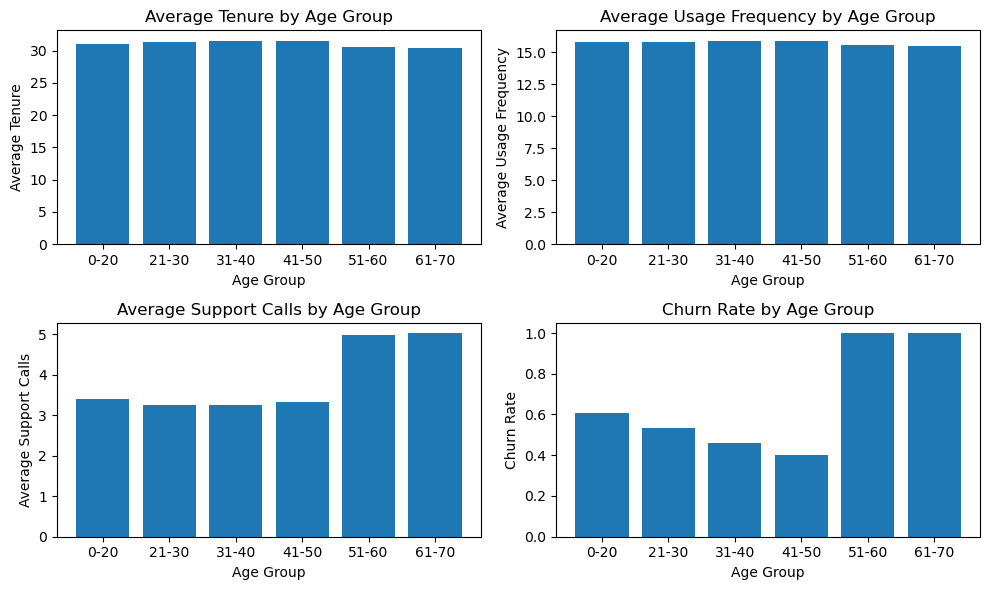

In [22]:
# Visualize the data
plt.figure(figsize=(10, 6))

# average tenure by age group
plt.subplot(2, 2, 1)
plt.bar(age_group_summary['Age Group'], age_group_summary['Tenure'])
plt.xlabel('Age Group')
plt.ylabel('Average Tenure')
plt.title('Average Tenure by Age Group')

#  average usage frequency by age group
plt.subplot(2, 2, 2)
plt.bar(age_group_summary['Age Group'], age_group_summary['Usage Frequency'])
plt.xlabel('Age Group')
plt.ylabel('Average Usage Frequency')
plt.title('Average Usage Frequency by Age Group')

#  average support calls by age group
plt.subplot(2, 2, 3)
plt.bar(age_group_summary['Age Group'], age_group_summary['Support Calls'])
plt.xlabel('Age Group')
plt.ylabel('Average Support Calls')
plt.title('Average Support Calls by Age Group')

#  churn  by age group
plt.subplot(2, 2, 4)
plt.bar(age_group_summary['Age Group'], age_group_summary['Churn'])
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')

plt.tight_layout()
plt.show()

### Observations
Churn Rate= (NO. of Churned Customers in Age Group / Total NO. of customers in that Age grp) * 100 
1. Age group 51-60 and 61-70 is having a higher average support calls.
2. In the age group 51-60 and 61-70 almost all of them are getting churned out.

## Total Spend and Payment Delay

Churn rate for high-total-spend customers: 0.4113265675969554
Churn rate for low-total-spend customers: 0.619129608559878


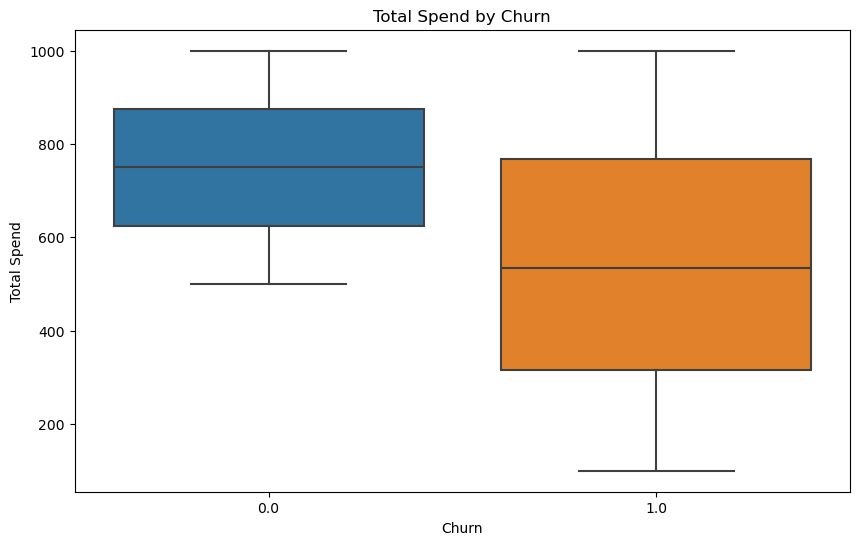

Average payment delay for churned customers: 15.217728870915483
Average payment delay for non-churned customers: 10.015500463756268


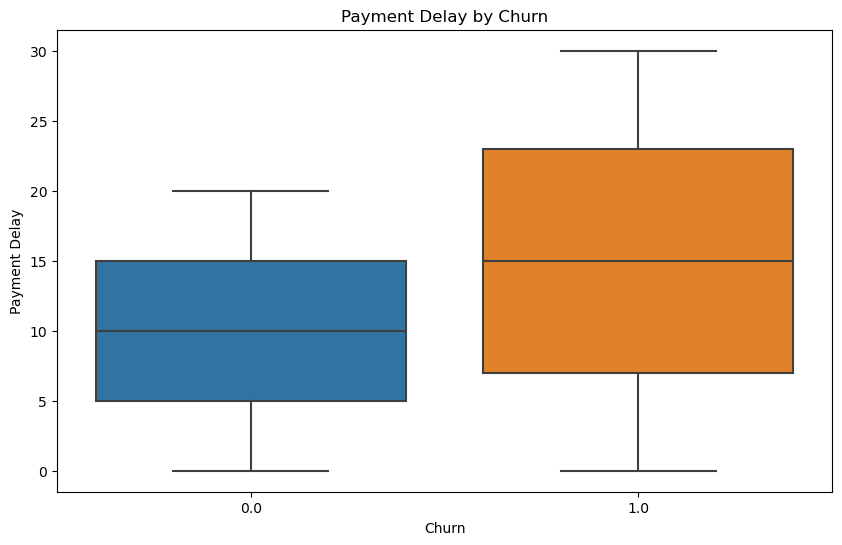

               Total Spend  Payment Delay     Churn
Total Spend       1.000000      -0.121044 -0.429355
Payment Delay    -0.121044       1.000000  0.312129
Churn            -0.429355       0.312129  1.000000


In [26]:
# Analyze Total Spend
# Identify high-value customers
tSpend=train.copy()
high_value_threshold = tSpend['Total Spend'].quantile(0.75)
high_value_customers = tSpend[tSpend['Total Spend'] >= high_value_threshold]

# Calculate churn rate for high-value and low-value customers
churn_rate_high_value = high_value_customers['Churn'].mean()
churn_rate_low_value = tSpend[tSpend['Total Spend'] < high_value_threshold]['Churn'].mean()

print(f"Churn rate for high-total-spend customers: {churn_rate_high_value}")
print(f"Churn rate for low-total-spend customers: {churn_rate_low_value}")

# Visualize Total Spend and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Total Spend', data=tSpend)
plt.title('Total Spend by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Spend')
plt.show()

# Analyze Payment Delay
# Calculate the average payment delay for churned vs. non-churned customers
avg_payment_delay_churn = tSpend[tSpend['Churn'] == 1]['Payment Delay'].mean()
avg_payment_delay_no_churn = tSpend[tSpend['Churn'] == 0]['Payment Delay'].mean()

print(f"Average payment delay for churned customers: {avg_payment_delay_churn}")
print(f"Average payment delay for non-churned customers: {avg_payment_delay_no_churn}")

# Visualize Payment Delay and Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Payment Delay', data=tSpend)
plt.title('Payment Delay by Churn')
plt.xlabel('Churn')
plt.ylabel('Payment Delay')
plt.show()

# Correlation Analysis
correlation_matrix = tSpend[['Total Spend', 'Payment Delay', 'Churn']].corr()
print(correlation_matrix)

### Observations:
1. Payment Delay is positively correlated to the churn.
2. Data is symmetric
3. No outliers

## Gender

In [30]:
gender=train.copy()
gender_names=gender.Gender.value_counts().index
gender_values=gender.Gender.value_counts().values

([<matplotlib.patches.Wedge at 0x2356e2f0050>,
 [Text(-0.2321308301870132, 1.0752280119475535, 'Male'),
  Text(0.23213093085712336, -1.0752279902138921, 'Female')],
 [Text(-0.12661681646564354, 0.5864880065168473, '56.77%'),
  Text(0.12661687137661273, -0.5864879946621229, '43.23%')])

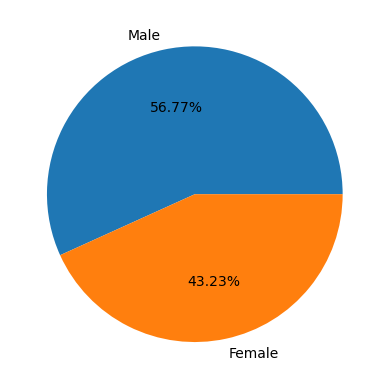

In [32]:
plt.pie(gender_values,labels=gender_names,autopct='%1.2f%%')

### Observations
1. A higher percentage of males customers indicates that males are the dominant group in our dataset.

## Tenure

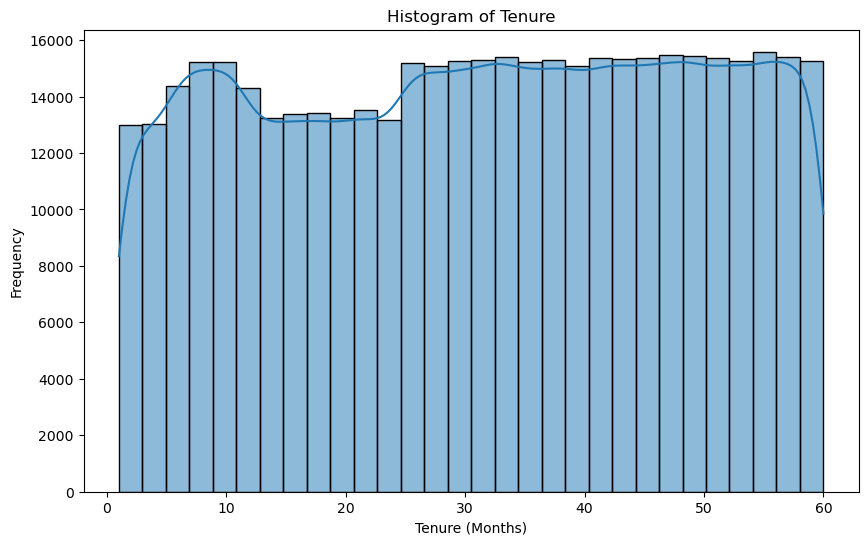

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Tenure'], bins=30, kde=True)
plt.title('Histogram of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

### Observations:
1. Tenure values are evenly distributed across the range.
3. As the tenure distribution is uniform, it might suggest that customers are equally likely to churn at any point in time.
There are no specific periods where churn is more or less likely.

## Contract Length

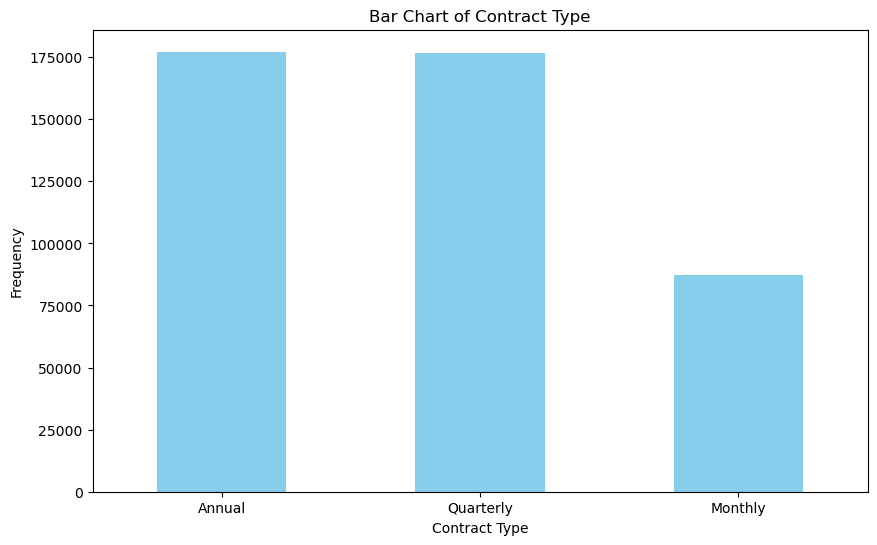

In [40]:
# Count the occurrences of each contract type
contract_counts = train['Contract Length'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
contract_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

### Observations
1. Less Monthly Frequency: Indicates possible that are more evident at higher time intervals.

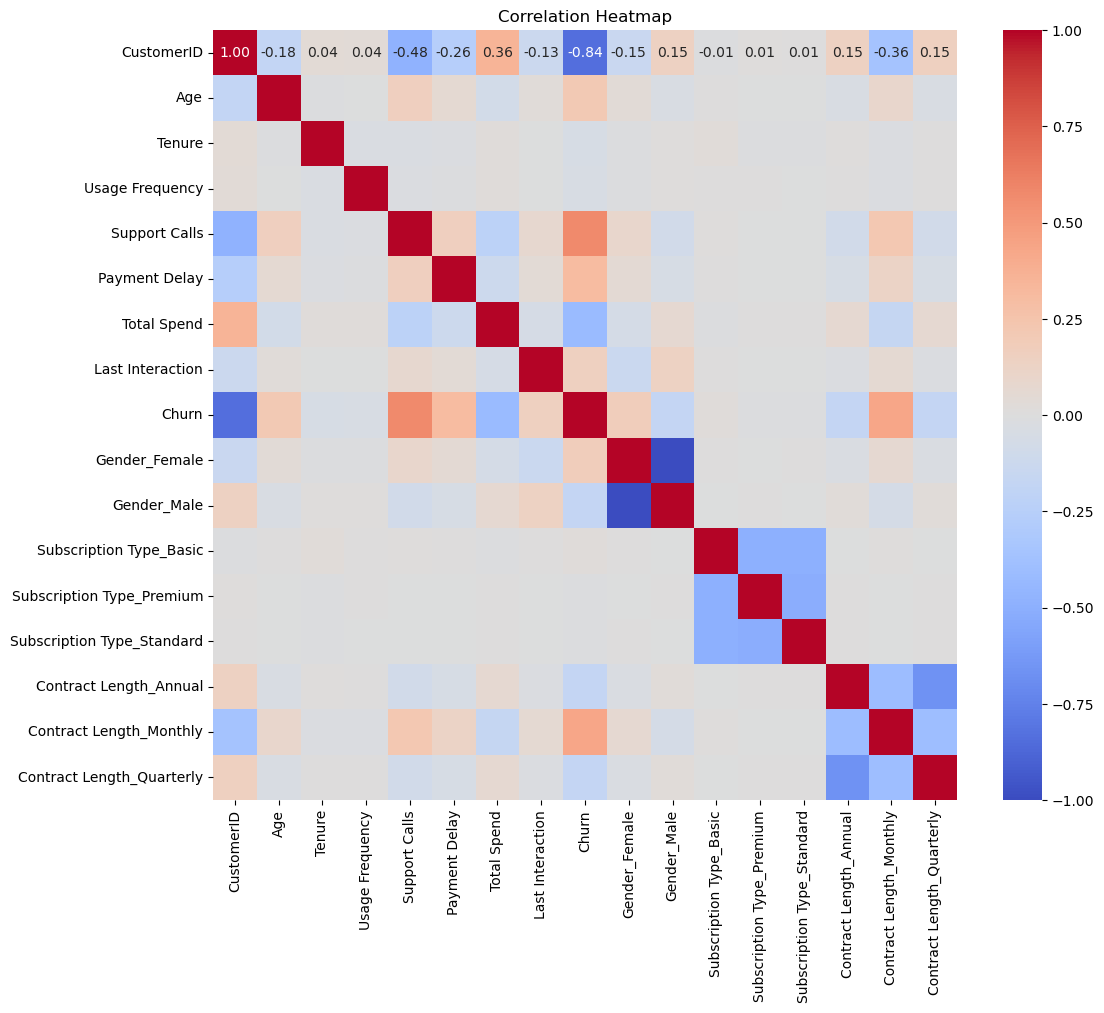

In [43]:
df_encoded = train.copy()
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Observations
With respect to churn, High Correlations we can observe in this heatmap are:
1. Support and Churn
2. Contract Monthly and churn
3. payment delay and churn

### Separating features and target

Note : I have excluded the customer id feature as it's constant feature 

In [48]:
df_encoded.head(5)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,True,False,False,False,True,True,False,False
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,True,False,True,False,False,False,True,False
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,True,False,True,False,False,False,False,True
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,False,True,False,False,True,False,True,False
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,False,True,True,False,False,False,True,False


In [357]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


X = df_encoded.drop(columns=['CustomerID','Tenure','Usage Frequency','Age','Total Spend','Last Interaction','Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard','Contract Length_Annual','Contract Length_Quarterly','Gender_Female','Gender_Male','Churn'])
y = df_encoded['Churn']
test=pd.read_csv('customer_churn_dataset-testing-master.csv')
df_encoded_test = test.copy()
categorical_columns = ['Gender', 'Subscription Type', 'Contract Length']
df_encoded_test = pd.get_dummies(df_encoded_test, columns=categorical_columns)

ytest = df_encoded_test['Churn']
Xtest = df_encoded_test.drop(columns=['CustomerID','Tenure','Usage Frequency','Age','Total Spend','Last Interaction','Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard','Contract Length_Annual','Contract Length_Quarterly','Gender_Female','Gender_Male','Churn'])



,Support Calls,Payment Delay,Contract Length_Monthly
0,5.0,18.0,False
1,10.0,8.0,True
2,6.0,18.0,False
3,7.0,7.0,True
4,5.0,8.0,True
...,...,...,...
440828,1.0,3.0,False
440829,1.0,20.0,False
440830,1.0,5.0,False
440831,2.0,0.0,False


# Gradient Boosting model

In [283]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [285]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

### Fitting Model

In [288]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=X
y_train=y
train_count = len(X_train)
test_count = len(Xtest)

print(f"Number of samples in train data: {train_count}")
print(f"Number of samples in test data: {test_count}")

Number of samples in train data: 440832
Number of samples in test data: 64374


In [290]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

In [292]:
# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {training_time:.2f} seconds")

Training time: 21.67 seconds


### Prediction:

In [295]:
y_pred = model.predict(Xtest)
y_pred_train = model.predict(X_train)

In [297]:
accuracy = accuracy_score(ytest, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm = confusion_matrix(ytest, y_pred)
report = classification_report(ytest, y_pred)

In [299]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9142 24739]
 [  598 29895]]


In [301]:
print(f"Accuracy test: {accuracy}")
print(f"Accuracy train: {accuracy_train}")

Accuracy test: 0.6064094199521546
Accuracy train: 0.9000957280778165


Accuracy Score of Test is very much lesser than Train data. So the model is Overfitted.

In [304]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.27      0.42     33881
           1       0.55      0.98      0.70     30493

    accuracy                           0.61     64374
   macro avg       0.74      0.63      0.56     64374
weighted avg       0.75      0.61      0.55     64374



### Classification Summary:
1. From Precision: The model is more accurate in predicting instances of class 'Not Churning Out' than class 'Churning Out'.It makes fewer false positive errors when predicting class 'Not Churning Out' than class 'Churning Out'.
2. From Recall: The model is very good at identifying most of the actual class 'Churning Out' instances, with few false negatives for class 'Churning Out'.
3. Model is overfitting.

# Logistic Regression Model

In [308]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

### Fit model

In [400]:
from sklearn.preprocessing import StandardScaler

numerical_features = list(df_encoded.loc[:, ['Payment Delay', 'Support Calls']])
numerical_features_2 = list(df_encoded_test.loc[:, ['Payment Delay', 'Support Calls']])
scaler = StandardScaler()

for feature in numerical_features:
    df_encoded[feature] = scaler.fit_transform(df_encoded[[feature]])
for feature in numerical_features:
    df_encoded_test[feature] = scaler.fit_transform(df_encoded_test[[feature]])

X_train_1 = df_encoded.drop(columns=['CustomerID','Tenure','Usage Frequency','Age','Total Spend','Last Interaction','Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard','Contract Length_Annual','Contract Length_Quarterly','Gender_Female','Gender_Male','Churn'])
y_train_1 = df_encoded['Churn']

Xtest_1 = df_encoded_test.drop(columns=['CustomerID','Tenure','Usage Frequency','Age','Total Spend','Last Interaction','Subscription Type_Basic','Subscription Type_Premium','Subscription Type_Standard','Contract Length_Annual','Contract Length_Quarterly','Gender_Female','Gender_Male','Churn'])
ytest_1=df_encoded_test['Churn']
# Xtest_1.head(5)

In [402]:
classifier=LogisticRegression()
classifier.fit(X_train_1,y_train_1)

LogisticRegression()

### Prediction

In [405]:
y_pred=classifier.predict(Xtest_1)
y_pred_train=classifier.predict(X_train_1)
score_test=accuracy_score(ytest_1,y_pred)
score_train=accuracy_score(y_train_1,y_pred_train)
print(f"Accuracy test: {score_test}")
print(f"Accuracy train: {score_train}")

Accuracy test: 0.6473110261906981
Accuracy train: 0.8545659117305459


Accuracy Score of Test is very much lesser than Train data. So the model is Overfitting.

### Confusion Matrix

In [409]:
print("Confusion Matrix:\n", confusion_matrix(ytest_1, y_pred))

Confusion Matrix:
 [[14573 19308]
 [ 3396 27097]]


### Report

In [397]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.43      0.56     33881
           1       0.58      0.89      0.70     30493

    accuracy                           0.65     64374
   macro avg       0.70      0.66      0.63     64374
weighted avg       0.70      0.65      0.63     64374



### Conclusion
In Logistic regression model ACCURACY and PRECISION is greater compared to the Gradient boosting. So I will go with Logistic regression 

# Ada Boosting

In [325]:
from sklearn.ensemble import AdaBoostClassifier
import time

In [421]:
adamodel = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
start_time = time.time()
adamodel.fit(X_train, y_train)
end_time = time.time()

In [423]:
# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {training_time:.2f} seconds")


Training time: 28.08 seconds


In [425]:
y_pred_ada=adamodel.predict(Xtest)
y_pred_train=adamodel.predict(X_train)

score_test=accuracy_score(ytest,y_pred_ada)
score_train=accuracy_score(y_train,y_pred_train)
print(f"Accuracy test: {score_test}")
print(f"Accuracy train: {score_train}")

Accuracy test: 0.6079007052536738
Accuracy train: 0.9000957280778165


Accuracy Score of Test is very much lesser than Train data. So the model is Overfitted.

### Confusion Matrix

In [415]:
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_ada))

Confusion Matrix:
 [[23172 10709]
 [19072 11421]]


### Report

In [427]:
print(classification_report(ytest,y_pred_ada))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53     33881
           1       0.56      0.82      0.66     30493

    accuracy                           0.61     64374
   macro avg       0.64      0.62      0.60     64374
weighted avg       0.64      0.61      0.59     64374



# Hyperparameter Tuning in Logistic Regression

In [341]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [343]:
parameter={'penalty':['l1','l2', 'elasticnet'], 'C': [1, 2, 3,4, 5, 6, 10, 20, 30, 40, 50], 'max_iter' : [100, 200, 300]}
classifier=LogisticRegression()
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [345]:
classifier_regressor.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [347]:
classifier_regressor.best_score_

0.8543549525365284

In [349]:
y_pred_ada=classifier_regressor.predict(Xtest)
y_pred_train=classifier_regressor.predict(X_train)

score_test=accuracy_score(ytest,y_pred_ada)
score_train=accuracy_score(y_train,y_pred_train)
print(f"Accuracy test: {score_test}")
print(f"Accuracy train: {score_train}")

Accuracy test: 0.5904713082921677
Accuracy train: 0.8545659117305459
